In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
pickle_in = open("data_3class.pkl","rb")
data3 = pickle.load(pickle_in)
train_X = data3['train'][0]
train_Y = data3['train'][1]
test_X = data3['test'][0]
test_Y = data3['test'][1]

iteration 0: loss 1.098712
iteration 10: loss 1.097900
iteration 20: loss 1.097044
iteration 30: loss 1.096088
iteration 40: loss 1.094969
iteration 50: loss 1.093614
iteration 60: loss 1.091939
iteration 70: loss 1.089840
iteration 80: loss 1.087191
iteration 90: loss 1.083841
iteration 100: loss 1.079612
iteration 110: loss 1.074296
iteration 120: loss 1.067662
iteration 130: loss 1.059468
iteration 140: loss 1.049483
iteration 150: loss 1.037521
iteration 160: loss 1.023487
iteration 170: loss 1.007419
iteration 180: loss 0.989527
iteration 190: loss 0.970193
iteration 200: loss 0.949936
iteration 210: loss 0.929341
iteration 220: loss 0.908971
iteration 230: loss 0.889306
iteration 240: loss 0.870709
iteration 250: loss 0.853431
iteration 260: loss 0.837624
iteration 270: loss 0.823368
iteration 280: loss 0.810679
iteration 290: loss 0.799526
iteration 300: loss 0.789836
iteration 310: loss 0.781505
iteration 320: loss 0.774408
iteration 330: loss 0.768411
iteration 340: loss 0.763

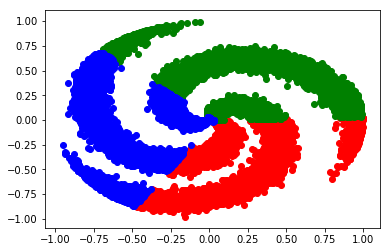

test accuracy: 0.53


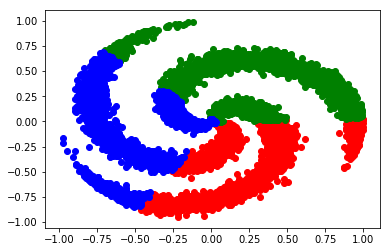

Training Error Plot


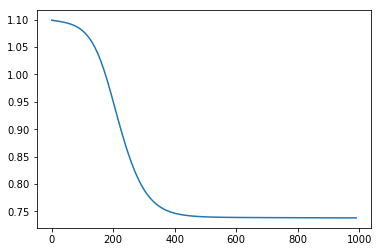

In [3]:
#gradient of tanh is 1-f(x)*f(x)

# initialize parameters randomly
D=2
K=3
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer = np.tanh(np.dot(train_X, W) + b) # Sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if(i % 10 == 0):
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    #print(dhidden)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*(1-(np.tanh(hidden_layer)*np.tanh(hidden_layer)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.tanh(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = np.tanh(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 1.134827
iteration 10: loss 1.047985
iteration 20: loss 0.977207
iteration 30: loss 0.915411
iteration 40: loss 0.863466
iteration 50: loss 0.823171
iteration 60: loss 0.794241
iteration 70: loss 0.774611
iteration 80: loss 0.761755
iteration 90: loss 0.753500
iteration 100: loss 0.748247
iteration 110: loss 0.744909
iteration 120: loss 0.742777
iteration 130: loss 0.741399
iteration 140: loss 0.740492
iteration 150: loss 0.739877
iteration 160: loss 0.739444
iteration 170: loss 0.739125
iteration 180: loss 0.738876
iteration 190: loss 0.738670
iteration 200: loss 0.738491
iteration 210: loss 0.738329
iteration 220: loss 0.738177
iteration 230: loss 0.738030
iteration 240: loss 0.737888
iteration 250: loss 0.737746
iteration 260: loss 0.737606
iteration 270: loss 0.737465
iteration 280: loss 0.737324
iteration 290: loss 0.737181
iteration 300: loss 0.737038
iteration 310: loss 0.736893
iteration 320: loss 0.736746
iteration 330: loss 0.736598
iteration 340: loss 0.736

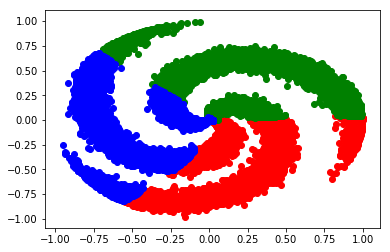

test accuracy: 0.55


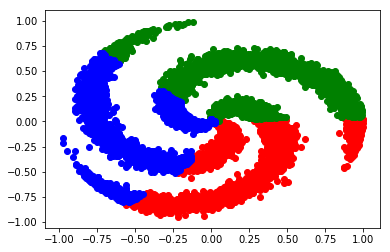

Training Error Plot


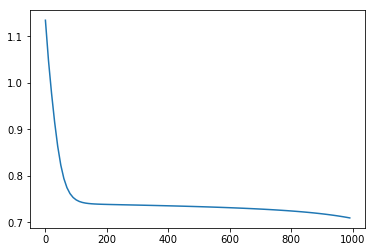

In [4]:
# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = np.tanh(np.dot(train_X, W) + b) # sigmoid activation
    hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) # sigmoid activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        x_plot.append(i)
        loss_plot.append(loss)
    # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*(1-(np.tanh(hidden_layer2)*np.tanh(hidden_layer2)))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*(1-(np.tanh(hidden_layer1)*np.tanh(hidden_layer1)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.tanh(np.dot(train_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer1 = np.tanh(np.dot(test_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()    

print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()


In [5]:
pickle_in = open("data_2class.pkl","rb")
data2 = pickle.load(pickle_in)
train_X = data2['train'][0]
train_Y = data2['train'][1]
test_X = data2['test'][0]
test_Y = data2['test'][1]

iteration 0: loss 0.692985
iteration 10: loss 0.692262
iteration 20: loss 0.691409
iteration 30: loss 0.690294
iteration 40: loss 0.688754
iteration 50: loss 0.686567
iteration 60: loss 0.683432
iteration 70: loss 0.678949
iteration 80: loss 0.672596
iteration 90: loss 0.663747
iteration 100: loss 0.651726
iteration 110: loss 0.635960
iteration 120: loss 0.616233
iteration 130: loss 0.592973
iteration 140: loss 0.567401
iteration 150: loss 0.541330
iteration 160: loss 0.516625
iteration 170: loss 0.494646
iteration 180: loss 0.476015
iteration 190: loss 0.460737
iteration 200: loss 0.448461
iteration 210: loss 0.438705
iteration 220: loss 0.430993
iteration 230: loss 0.424903
iteration 240: loss 0.420093
iteration 250: loss 0.416285
iteration 260: loss 0.413263
iteration 270: loss 0.410858
iteration 280: loss 0.408938
iteration 290: loss 0.407401
iteration 300: loss 0.406167
iteration 310: loss 0.405172
iteration 320: loss 0.404368
iteration 330: loss 0.403717
iteration 340: loss 0.403

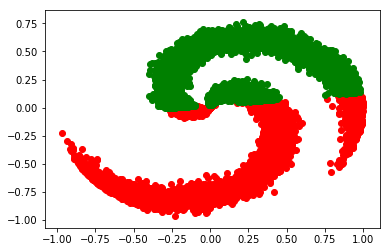

test accuracy: 0.71


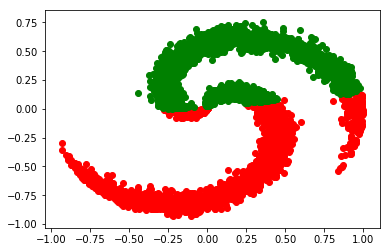

Training Error Plot


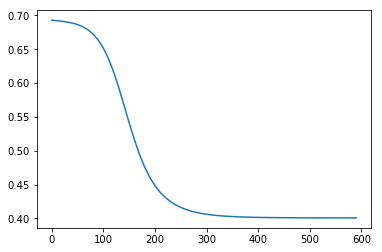

In [6]:
#gradient of tanh is 1-f(x)*f(x)

# initialize parameters randomly
D=2
K=2
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer = np.tanh(np.dot(train_X, W) + b) # Sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if(i % 10 == 0):
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    #print(dhidden)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*(1-(np.tanh(hidden_layer)*np.tanh(hidden_layer)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.tanh(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer = np.tanh(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 0.738046
iteration 10: loss 0.626714
iteration 20: loss 0.548716
iteration 30: loss 0.491197
iteration 40: loss 0.453740
iteration 50: loss 0.431514
iteration 60: loss 0.418775
iteration 70: loss 0.411497
iteration 80: loss 0.407298
iteration 90: loss 0.404841
iteration 100: loss 0.403380
iteration 110: loss 0.402496
iteration 120: loss 0.401952
iteration 130: loss 0.401611
iteration 140: loss 0.401390
iteration 150: loss 0.401244
iteration 160: loss 0.401142
iteration 170: loss 0.401067
iteration 180: loss 0.401010
iteration 190: loss 0.400962
iteration 200: loss 0.400921
iteration 210: loss 0.400883
iteration 220: loss 0.400847
iteration 230: loss 0.400813
iteration 240: loss 0.400778
iteration 250: loss 0.400744
iteration 260: loss 0.400710
iteration 270: loss 0.400675
iteration 280: loss 0.400639
iteration 290: loss 0.400603
iteration 300: loss 0.400566
iteration 310: loss 0.400529
iteration 320: loss 0.400490
iteration 330: loss 0.400451
iteration 340: loss 0.400

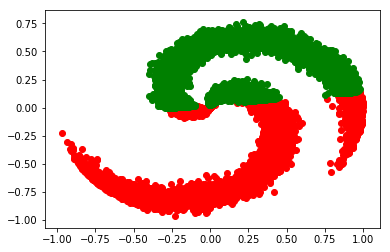

test accuracy: 0.72


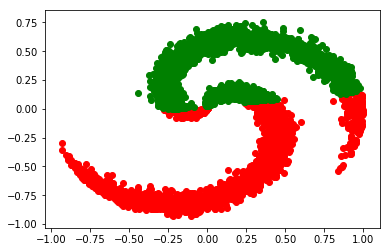

Training Error Plot


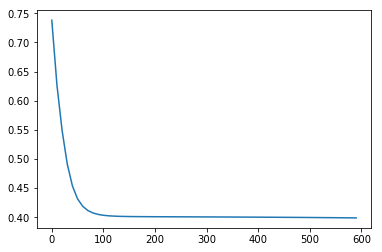

In [7]:
# initialize parameters randomly
D=2
K=2
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer1 = np.tanh(np.dot(train_X, W) + b) # sigmoid activation
    hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) # sigmoid activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        x_plot.append(i)
        loss_plot.append(loss)
    # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*(1-(np.tanh(hidden_layer2)*np.tanh(hidden_layer2)))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*(1-(np.tanh(hidden_layer1)*np.tanh(hidden_layer1)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.tanh(np.dot(train_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer1 = np.tanh(np.dot(test_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()    

print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()
